# Autômatos Celulares

Autômatos celulares são interessantes pois são modelos simples que podem apresentar comportamentos extremamente complexos, demonstrando o conceito importante em ciência da complexidade de que o comportamento de um sistema pode ser inesperado mesmo quando conhecemos detalhadamente o comportamento dos elementos que o compõe.

Um autômato celular tem as seguintes características:

- Ele se compõe de um conjunto discreto de $n$ **células**, geralmente denominadas por um índice $i=1,\ldots,n$.
- A operação dinâmica ocorre em instantes discretos de tempo $t\in\mathbb{N}$.
- A cada célula $i$ em cada instante $t$ temos um estado $s_i(t)$. Muitas vezes, o conjunto de valores possíveis para o estado é discreto e mesmo finito.
- Cada célula $i$ tem um conjunto de **células vizinhas** $N_i$. Muitas vezes o arranjo de células vizinhas é bastante regular considerando uma distribuição espacial das células.
- O estado de todas as células é atualizado simultaneamente de $t$ para $t+1$.
- O estado no instante $t+1$ de uma célula depende apeans do estado em $t$ da própria célula $s_i(t)$ e de suas vizinhas $s_j(t), j\in N_i$.

## Autômatos celulares elementares

Vejamos o que talvez seja o caso mais simples de autômatos celulares.

Neste caso, consideramos que as células estão distribuídas em um arranjo linear e cada célula $i$ tem como vizinhos as células $i-1$ (esquerda) e $i+1$ (direita).

Neste arranjo, precisamos considerar os casos especiais das células $i=1$ e $i=n$, isto é, precisamos definir as condições de contorno. Usaremos aqui condições de contorno periódicas, isto é, consideramos que a célula à esquerda da célula 1 é a célula $n$ e a célula à direita da célula $n$ é a célula 1.

O estado nestes autômatos é restrito ao conjunto $\{0,1\}$.

Falta agora estabelecer as regras de atualização. Essas regras serão algo da forma:

| esquerda | célula | direita | novo estado |
|--------------|----------|--------------|------------|
| 0 | 0 | 0 | 0 |
| 0 | 0 | 1 | 0 |
| 0 | 1 | 0 | 0 |
| 0 | 1 | 1 | 1 |
| 1 | 0 | 0 | 1 |
| 1 | 0 | 1 | 1 |
| 1 | 1 | 0 | 0 |
| 1 | 1 | 1 | 1 |

Esta tabela diz, por exemplo, que se para uma célula qualquer, se ela estiver em 1, a sua vizinha da esquerda estiver em 1 e a sua vizinha da direita estiver em 0, então ela passará a ter o valor 0 no próximo instante de tempo.

### Numeração das regras

Na tabela acima, o que distingue uma regra da outra são os valores na coluna *novo estado*. Como temos 8 linhas nessa coluna, e como cada linha pode ter 2 valores distintos, então vemos que o total de regras possíveis para esse tipo de autômato celular é $2^8=256$.

Wolfram, que estudou esses autômatos detalhadamente, propôs uma numeração para identificá-los, que consiste em ler os números da coluna *novo estado* como um número binário, com a entrada correspondente à última linha sendo o bit mais significativo, e a entrada da primeira linha sendo o bit menos significativo. Assim, a regra da tabela acima é denominada **regra 184**, pois $1\cdot2^7+0\cdot2^6+1\cdot2^5+1\cdot2^4+1\cdot2^3+0\cdot2^2+0\cdot2^1+0\cdot2^0=184$.

### Condições iniciais

Para executar a dinâmica, falta especificar as condições iniciais $s_i(0)$.

Com $n$ células, cada uma com 2 estados possíveis por célula, o número total de estados entre os quais escolher a condição inicial é $2^n$.

Aqui vamos considerar apenas duas formas de inicialização:

1. **Perturbação pontual:** Neste caso, uma das células é inicializada em $1$, enquanto todas as outras são inicializadas em $0$.
2. **Aleatória:** Neste caso, o valor inicial de cada célula é escolhido aleatoriamente de modo que ela tem valor $1$ com probabilidade $p$ e valor $0$ com probabilidade $1-p$.

## Códigos

Vamos agora preparar alguns códigos para ajudar a estudar esses autômatos celulares.

Representamos uma regra por uma lista que tem no índice $i$ a entrada da coluna de novo estado da $i$-ésima linha da tabela dessa regra. Para saber o novo valor do estado de uma célula, basta ler a entrada correspondente dados os valores da célula e seus vizinhos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def digits(n, b, m):
    """Computes the m least significative digits of n in base b."""
    alldigits = np.zeros(m, dtype=np.int)
    i = 0
    while i < m and n != 0:
        alldigits[i] = n % b
        n //= b
        i += 1
    return alldigits

In [4]:
class Rule:
    # Initializa an np.array of int with the rule table
    def __init__(self, rule_code):
        """Creates a table for the rule given by rule_code"""
        self.table = digits(rule_code, 2, 8)
            
    def next_state(self, s):
        """s is the current value of s[i-1], s[i], s[i+1]. Lookup table for next state."""
        return self.table[s[0]*4+s[1]*2+s[2]]

Agora precisamos de uma função para plotar uma evolução temporal de um autômato celular.

In [5]:
def plot_evolution(evolution, nstates=2):
    """Plots the time evolution of the states given in evolution.
    Input should have one time step per line and one cell per column.
    0 is ploted white; 1 is ploted black."""
    plt.matshow(evolution, vmin=0, vmax=nstates-1, cmap='binary')
    plt.xticks([])
    plt.yticks([])

Precisamos também funções para criar a condição inicial de um autômato, dado o tamanho do autômato e a probabilidade de estado 1, para o caso de inicialização aleatória.

In [6]:
def init_perturbation(n):
    """Inicializes an elementary cellular automaton with just one cell 1 in the centre."""
    res = np.zeros(n, dtype=np.int)
    res[n//2] = 1
    return res

In [7]:
def init_random(n, p):
    """Initializes an elementary cellular automaton with a probability p for each cell to be 1."""
    return (np.random.random(n) < p).astype(np.int)

A próxima função calcula a evolução de um autômato celular, dada a regra, uma condição inicial e o número de passos.

In [8]:
def evolve(rule, init, T):
    """Evolves the elementary automaton given by rule from the initial condition init for T time steps."""
    n = init.size
    evolution = np.zeros((T+1, n), dtype=np.int)
    evolution[0, :] = init
    for t in range(T):
        evolution[t+1, 0] = rule.next_state([evolution[t, n-1], evolution[t, 0], evolution[t, 1]])
        for i in range(1, n-1):
            evolution[t+1, i] = rule.next_state(evolution[t, (i-1):(i+2)])
        evolution[t+1, n-1] = rule.next_state([evolution[t, n-2], evolution[t, n-1], evolution[t, 0]])
    return evolution

## Dualidade

Entre as 256 regras possíveis, existe uma relação duas a duas, que chamaremos de **dualidade**.

Seja uma regra $r$ com código $$r=\sum_{j=0}^{7}r_i 2^i,$$ onde $r_i$ são os dígitos binários do seu código. Consideremos agora a regra $$\bar{r}=\sum_{j=0}^{7}\bar{r}_{8-j}2^j,$$ onde $\bar{r}_i$ é o inverso do dígito binário $r_i$, isto é,
$$\bar{r}_i = 1 - r_i.$$

Denominamos a regra $\bar{r}$ como a regra **dual** de $r$. A procedimento acima indica que para achar a regra dual pegamos a representação binária com 8 bits, invertemos cada um dos bits e depois revertemos a ordem dos bits.

Por exemplo, Para a regra 184, que tem representação binária 10111000 invertemos para 00011101 e então trocamos os bits para 11100010, isto é, a dual da regra 184 é a regra 226.

Algumas regras são duas de si mesmas. Por exemplo a regra 23: 00010111 inverte para 11101000 e trocamos os bits para 00010111, isto é, 23.

Note que a dualidade é recíproca: Se $r_2$ é dual de $r_1$, então $r_1$ é dual de $r_2$.

Também podemos definir uma dualidade para estados: Dado um estado $$s = (s_1, s_2, \ldots, s_n),$$ o seu dual é $$\bar{s} = (\bar{s}_1, \bar{s}_2, \ldots, \bar{s}_n).$$

A seguinte propriedade pode ser verificada com facilidade:

---
Se a evolução temporal de uma regra $r$ partindo de um estado inicial $s(0)$, é $s(t)$, então a evolução da regra dual $\bar{r}$ partindo do estado dual $\bar{s}(0)$ será dual: $\bar{s}(t)$.

---

Para ver isso, vamos criar alguns códigos e verificar alguns exemplos.

In [11]:
def dual_state(state):
    return 1 - state

def dual_rule(rule):
    newrule = Rule(0)
    newrule.table = 1 - np.flip(rule.table)
    return newrule

In [12]:
T = 20
s0 = init_perturbation(2 * T + 1)
s0_bar = dual_state(s0)

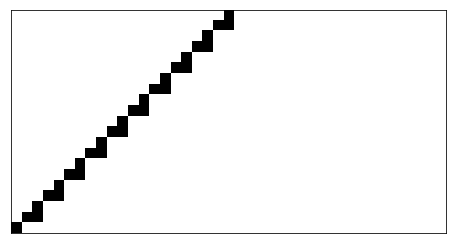

In [13]:
plot_evolution(evolve(Rule(6), s0, T))

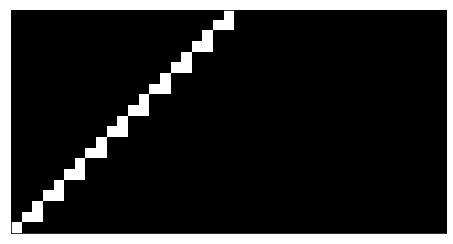

In [14]:
plot_evolution(evolve(dual_rule(Rule(6)), dual_state(s0), T))

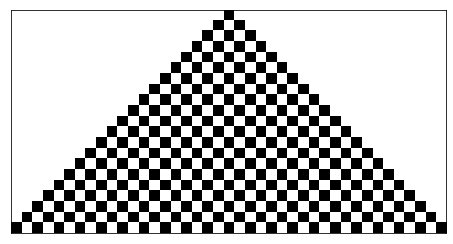

In [15]:
plot_evolution(evolve(Rule(50), s0, T))

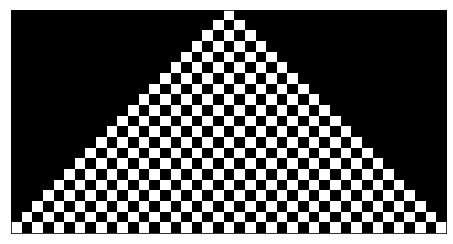

In [16]:
plot_evolution(evolve(dual_rule(Rule(50)), dual_state(s0), T))

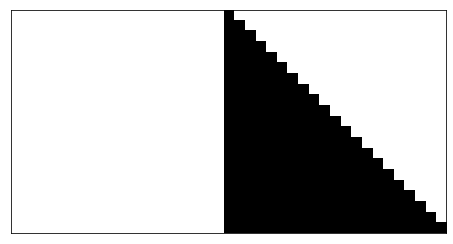

In [17]:
plot_evolution(evolve(Rule(220), s0, T))

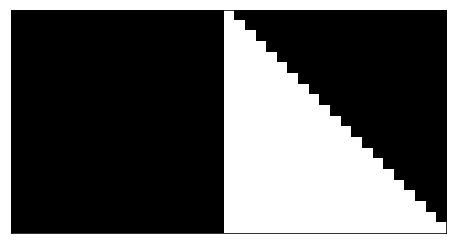

In [18]:
plot_evolution(evolve(dual_rule(Rule(220)), dual_state(s0), T))

Vejamos um caso de regra que é dual dela mesma:

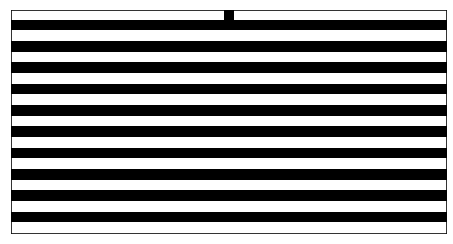

In [19]:
plot_evolution(evolve(Rule(23), s0, T))

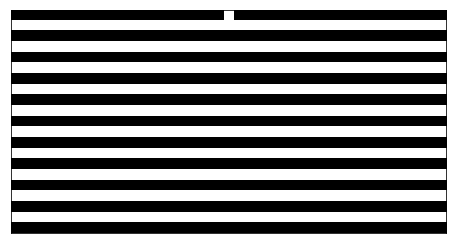

In [20]:
plot_evolution(evolve(dual_rule(Rule(23)), dual_state(s0), T))

Mas não se confunda: a evolução é dual quando se começa de condições iniciais duais. Se se começa da mesma condição inicial, a evolução pode ser não relacionada.

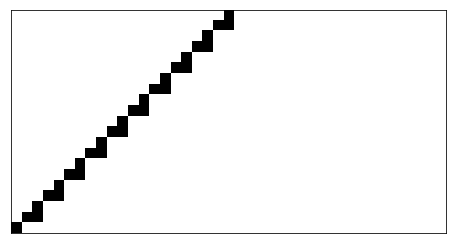

In [21]:
plot_evolution(evolve(Rule(6), s0, T))

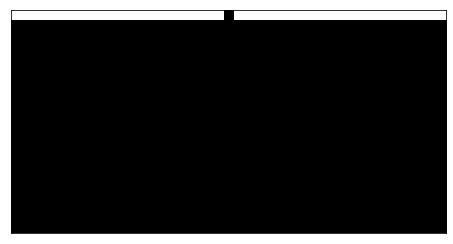

In [22]:
plot_evolution(evolve(dual_rule(Rule(6)), s0, T))

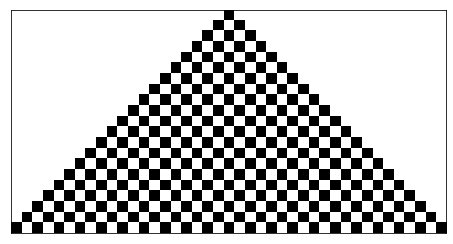

In [23]:
plot_evolution(evolve(Rule(50), s0, T))

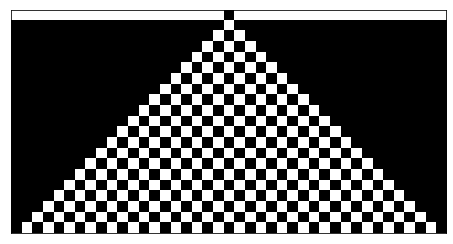

In [24]:
plot_evolution(evolve(dual_rule(Rule(50)), s0, T))

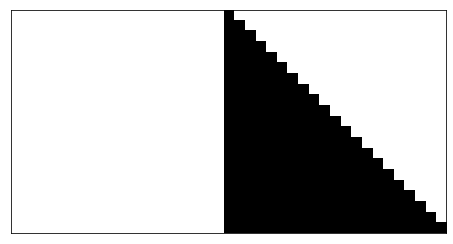

In [25]:
plot_evolution(evolve(Rule(220), s0, T))

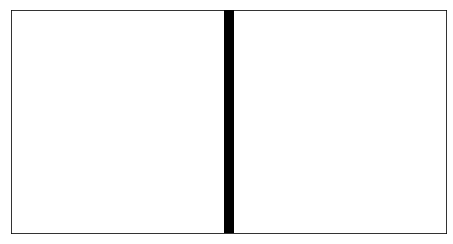

In [26]:
plot_evolution(evolve(dual_rule(Rule(220)), s0, T))

## Reversão binária

Outra relação existente entre as regras é a reversão binária. Neste caso, para uma combinação de estados da célula e de suas vizinhas em que uma das regras produz 0, a outra produz 1, e vice-versa.

Esta relação corresponde à inversão binária do número de regra, isto é, dada uma regra $r=\sum_{i=0},^7r_i 2^i$, a sua reversa será a regra $$\sum_{i=0}^7(1-r_i)2^i=\sum_{i=0}^7 2^i - \sum_{i=0}^7r_i 2^i = 2^8 - 1 - r = 255 - r.$$

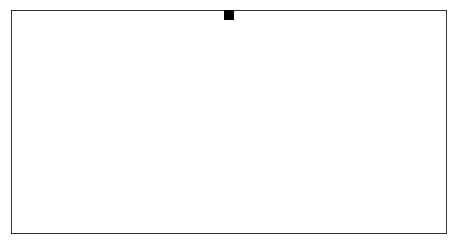

In [27]:
plot_evolution(evolve(Rule(96), s0, T))

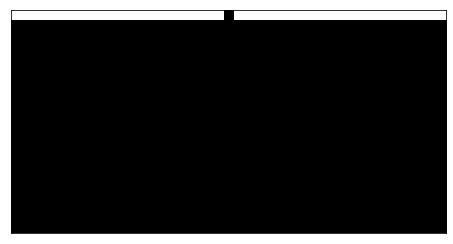

In [28]:
plot_evolution(evolve(Rule(255-96), s0, T))

## Simetria direita-esquerda

Outra relação entre regras é a simetria direita-esquerda, que ocorre quando uma regra é similar à outra se trocarmos as prescrições de "direita" e "esquerda" na regra.

Por exemplo, a regra 6 tem tabela

| esquerda | célula | direita | novo estado |
|--------------|----------|--------------|------------|
| 0 | 0 | 0 | 0 |
| 0 | 0 | 1 | 1 |
| 0 | 1 | 0 | 1 |
| 0 | 1 | 1 | 0 |
| 1 | 0 | 0 | 0 |
| 1 | 0 | 1 | 0 |
| 1 | 1 | 0 | 0 |
| 1 | 1 | 1 | 0 |

Nesta regra 6, o novo estado é ligado apenas se a célula da **esquerda** está desligada e a da **direita** tem valor oposto. Revertendo "direita" e "esquerda" ficamos com a regra: _ligar o novo estado se a célula da **direita** estiver desligada e a da **esquerda** tiver valor oposto_, o que corresponde à tabela

| esquerda | célula | direita | novo estado |
|--------------|----------|--------------|------------|
| 0 | 0 | 0 | 0 |
| 0 | 0 | 1 | 0 |
| 0 | 1 | 0 | 1 |
| 0 | 1 | 1 | 0 |
| 1 | 0 | 0 | 1 |
| 1 | 0 | 1 | 0 |
| 1 | 1 | 0 | 0 |
| 1 | 1 | 1 | 0 |

e portanto à regra de número 20.

Dada uma regra com número $\sum_{i=0}^{7}r_i 2^i$ ($r_i$ são os dígitos binários da regra), a sua simétrica será a regra de número $\hat{r} = \sum_{i=0}^{7}\hat{r}_i 2^i$ onde $\hat{r}_1=r_4, \hat{r}_4=r_1, \hat{r}_3=r_6, \hat{r}_6=r_3$ e $\hat{r}_i = r_i$ para $i\notin\{1, 4, 3, 6\}$. A diferença numérica entre duas regras simétricas é então
$$(r_6-r_3)(2^6-2^3) + (r_4-r_1)(2^4-2^1) = 56(r_6-r_3) + 14(r_4-r_1).$$

Vemos que, caso $r_1=r_4$ e $r_3=r_6$ então a regra é simétrica dela mesma, e portanto tem comportamento simétrico direita-esquerda.

In [29]:
def symmetric_rule(r):
    newrule = r
    newrule.table[1], newrule.table[4] = r.table[4], r.table[1]
    newrule.table[3], newrule.table[6] = r.table[6], r.table[3]
    return newrule

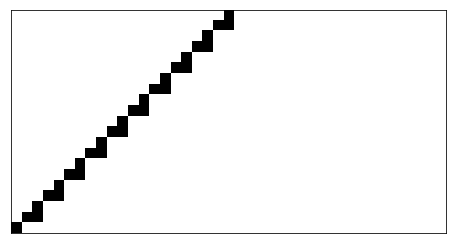

In [30]:
plot_evolution(evolve(Rule(6), s0, 20))

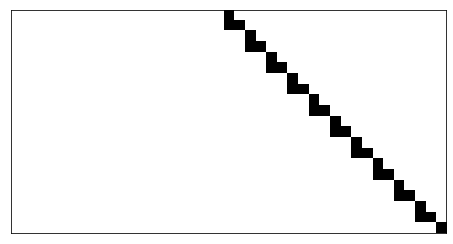

In [31]:
plot_evolution(evolve(symmetric_rule(Rule(6)), s0, T))

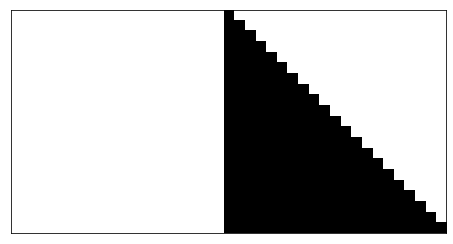

In [32]:
plot_evolution(evolve(Rule(220), s0, T))

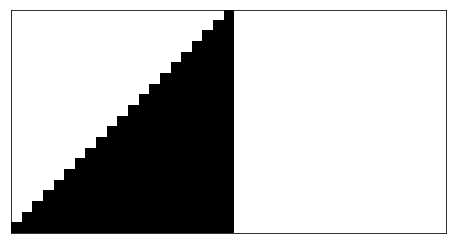

In [33]:
plot_evolution(evolve(symmetric_rule(Rule(220)), s0, T))

## Alguns estudos de caso simples

Vejamos agora que tipos de comportamento encontramos em autômatos celulares, executando algumas regras para uma perturbação e para estados aleatórios com probabilidade de 0.1, 0.3, e 0.5 do estado de uma célular ser 1.

Note que a regra 0 é desinteressante, pois o próximo estado é sempre 0, não importa o estado atual. Da mesma forma, a regra dual 255 tem o próximo estado sempre 1.

In [34]:
T = 100
s0_pert = init_perturbation(2 * T + 1)
s0_p1 = init_random(100, 0.1)
s0_p3 = init_random(100, 0.3)
s0_p5 = init_random(100, 0.5)

### Regras 204, 240 e 170

Vamos começar com a regra 204.

In [35]:
r = Rule(204)

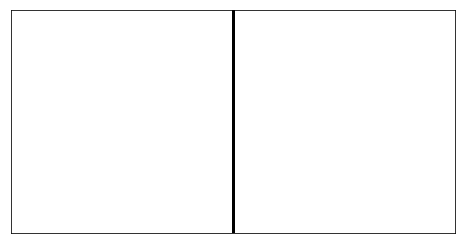

In [36]:
plot_evolution(evolve(r, s0_pert, T))

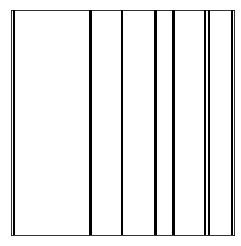

In [37]:
plot_evolution(evolve(r, s0_p1, T))

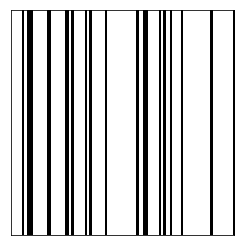

In [38]:
plot_evolution(evolve(r, s0_p3, T))

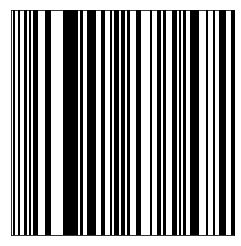

In [39]:
plot_evolution(evolve(r, s0_p5, T))

Vemos que a regra 204 sempre copia o estado inicial. Isso é fácil de entender le olharmos a sua tabela de evolução (204 em binário é 11001100):

| esquerda | célula | direita | novo estado |
|--------------|----------|--------------|------------|
| 0 | 0 | 0 | 0 |
| 0 | 0 | 1 | 0 |
| 0 | 1 | 0 | 1 |
| 0 | 1 | 1 | 1 |
| 1 | 0 | 0 | 0 |
| 1 | 0 | 1 | 0 |
| 1 | 1 | 0 | 1 |
| 1 | 1 | 1 | 1 |

Note que o novo estado é sempre igual ao estado atual da célula, independente dos valores das células vizinhas.

Algo similar ocorre com as regras que copiam o estado da célula da esquerda ou da célula da direita:

| esquerda | célula | direita | novo estado |
|--------------|----------|--------------|------------|
| 0 | 0 | 0 | 0 |
| 0 | 0 | 1 | 0 |
| 0 | 1 | 0 | 0 |
| 0 | 1 | 1 | 0 |
| 1 | 0 | 0 | 1 |
| 1 | 0 | 1 | 1 |
| 1 | 1 | 0 | 1 |
| 1 | 1 | 1 | 1 |

Esta tabela corresponde à regra 240.

| esquerda | célula | direita | novo estado |
|--------------|----------|--------------|------------|
| 0 | 0 | 0 | 0 |
| 0 | 0 | 1 | 1 |
| 0 | 1 | 0 | 0 |
| 0 | 1 | 1 | 1 |
| 1 | 0 | 0 | 0 |
| 1 | 0 | 1 | 1 |
| 1 | 1 | 0 | 0 |
| 1 | 1 | 1 | 1 |

Esta tabela corresponde à regra 170.

Nestes casos, ocorre também uma "cópia", mas ela é deslocada no espaço à esquerda ou à direita.

In [46]:
r = Rule(240)

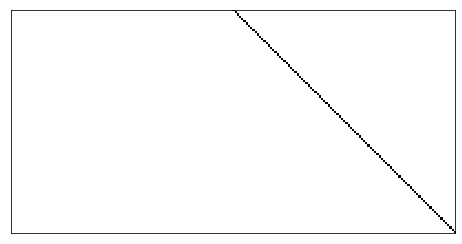

In [41]:
plot_evolution(evolve(r, s0_pert, T))

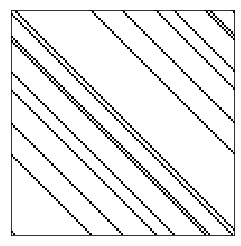

In [47]:
plot_evolution(evolve(r, s0_p1, T))

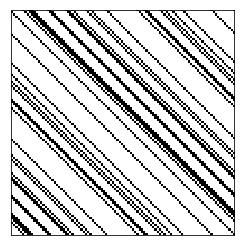

In [48]:
plot_evolution(evolve(r, s0_p3, T))

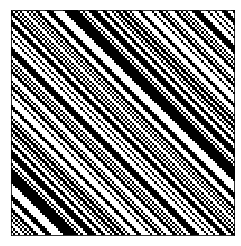

In [49]:
plot_evolution(evolve(r, s0_p5, T))

In [50]:
r = Rule(170)

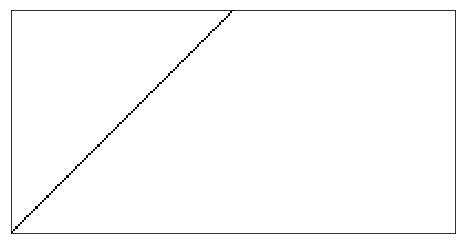

In [43]:
plot_evolution(evolve(r, s0_pert, T))

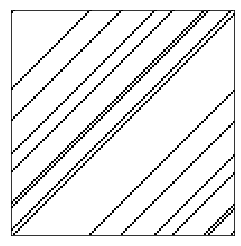

In [51]:
plot_evolution(evolve(r, s0_p1, T))

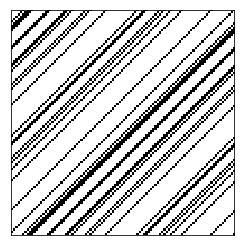

In [52]:
plot_evolution(evolve(r, s0_p3, T))

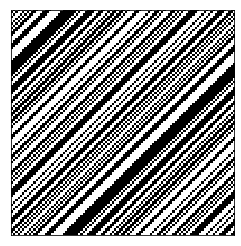

In [53]:
plot_evolution(evolve(r, s0_p5, T))

### Regra 1

A regra 1 coloca em 1 apenas células que estão em 0 e seus dois vizinhos também estão em 0. Como vemos abaixo, isso leva a um comportamento final aleatório que depende das condições iniciais.

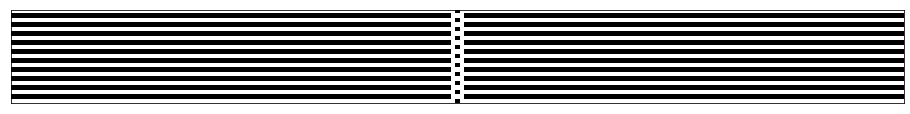

In [54]:
plot_evolution(evolve(Rule(1), s0_pert, 20))

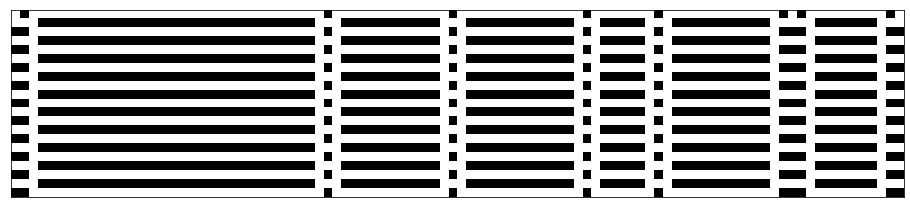

In [55]:
plot_evolution(evolve(Rule(1), s0_p1, 20))

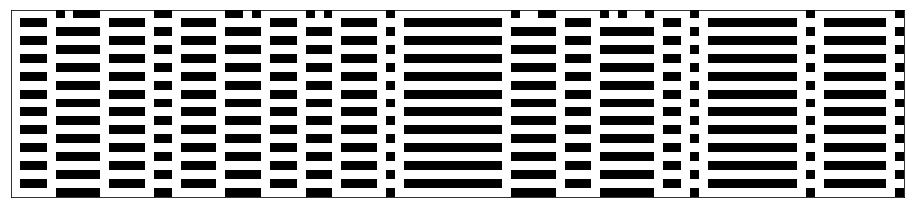

In [56]:
plot_evolution(evolve(Rule(1), s0_p3, 20))

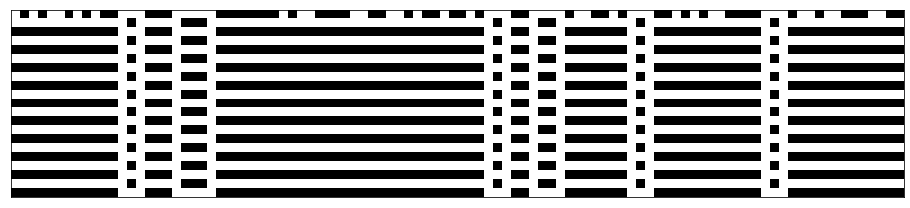

In [57]:
plot_evolution(evolve(Rule(1), s0_p5, 20))

### Regra 2

A regra 2 só preserva pontos com pelo menos dois espaços em branco anteriores e os desloca à esquerda.

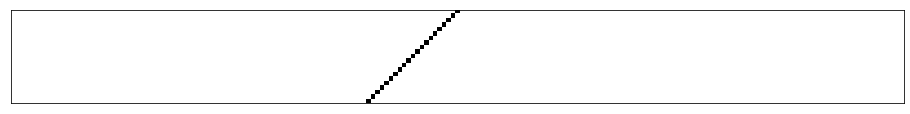

In [58]:
plot_evolution(evolve(Rule(2), s0_pert, 20))

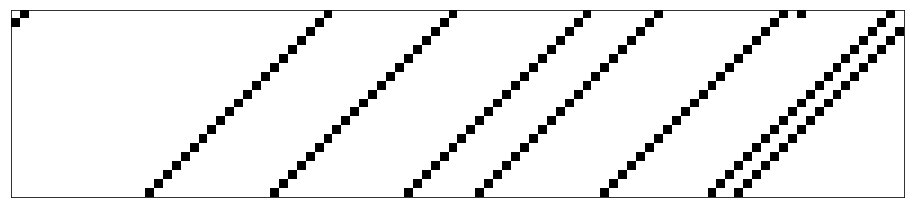

In [59]:
plot_evolution(evolve(Rule(2), s0_p1, 20))

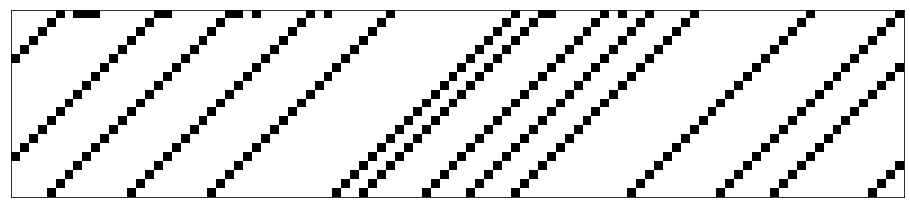

In [60]:
plot_evolution(evolve(Rule(2), s0_p3, 20))

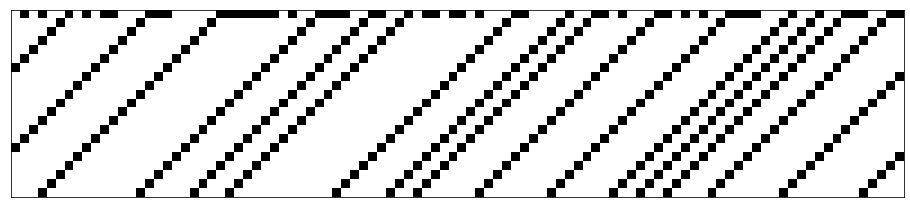

In [61]:
plot_evolution(evolve(Rule(2), s0_p5, 20))

### Regra 3

A regra 3 liga uma célula se ela estiver desligada e sua vizinha à esquerda também estiver desligada, não importa o valor do vizinha da esquerda. O resultado, como vemos abaixo, é uma combinação de oscilação (com padrão que depende do estado inicial) com deslocamento à direita.

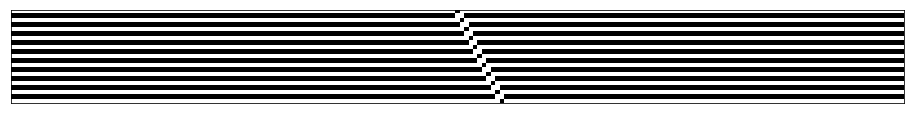

In [62]:
plot_evolution(evolve(Rule(3), s0_pert, 20))

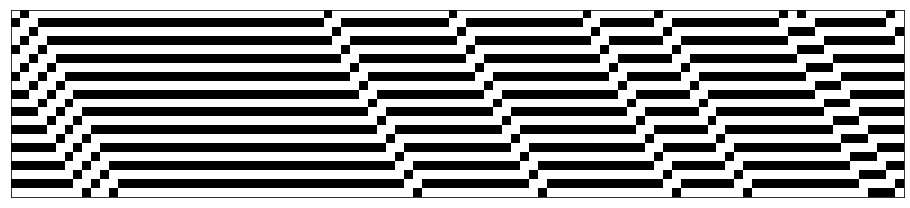

In [63]:
plot_evolution(evolve(Rule(3), s0_p1, 20))

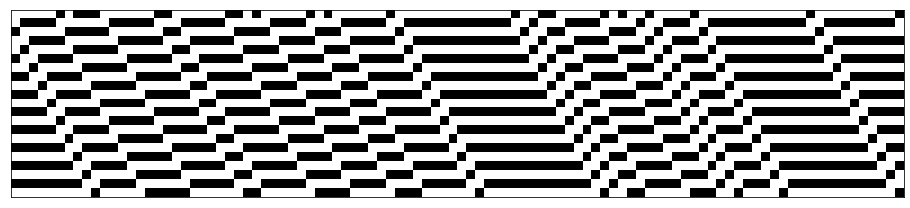

In [64]:
plot_evolution(evolve(Rule(3), s0_p3, 20))

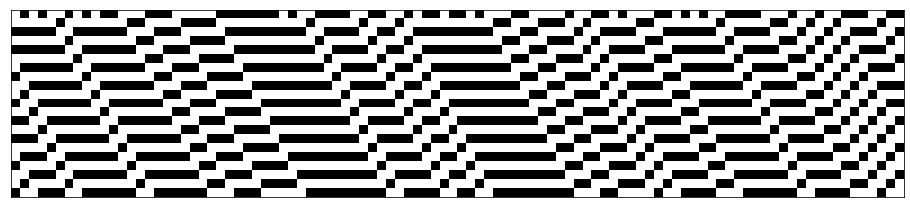

In [65]:
plot_evolution(evolve(Rule(3), s0_p5, 20))

### Regra 4

A regra 4 mantém uma célula ligada apenas se as suas duas vizinhas estão desligadas. Isto leva a um apagamento de grupos de células ligadas consecutivas, seguido pela cópia das células isoladas restantes.

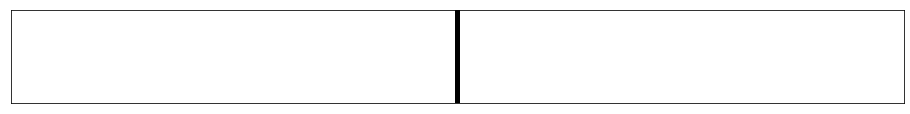

In [66]:
plot_evolution(evolve(Rule(4), s0_pert, 20))

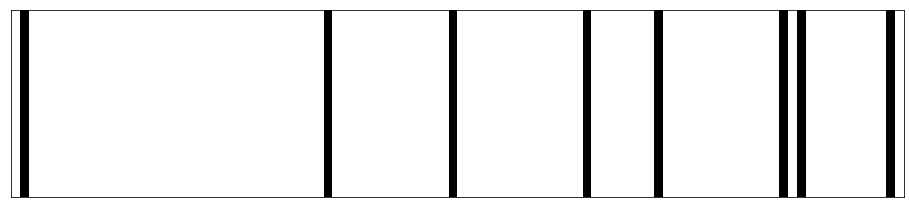

In [67]:
plot_evolution(evolve(Rule(4), s0_p1, 20))

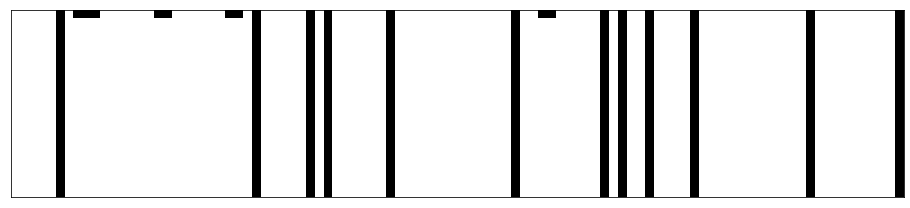

In [68]:
plot_evolution(evolve(Rule(4), s0_p3, 20))

In [69]:
plot_evolution(evolve(Rule(4), s0_p5, 20))

### Regra 5

Na regra 5, uma célula é ligada se as suas duas vizinhas são ligadas, independentemente do valor atual da célula. Isto leva a uma oscilação que depende da condição inicial, com algumas células isoladas continuamente ligadas e grupos de células piscando.

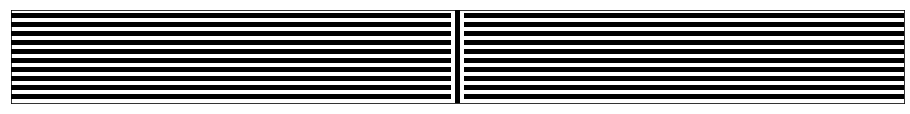

In [70]:
plot_evolution(evolve(Rule(5), s0_pert, 20))

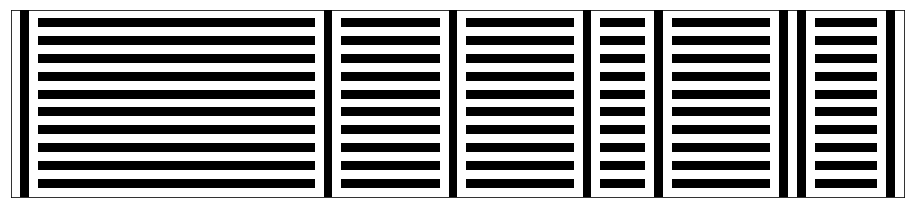

In [71]:
plot_evolution(evolve(Rule(5), s0_p1, 20))

In [72]:
plot_evolution(evolve(Rule(5), s0_p3, 20))

In [73]:
plot_evolution(evolve(Rule(5), s0_p5, 20))

### Regra 6

A regra 6 liga uma célula se a sua vizinha à esquerda está desligada e se sua vizinha à direita tem o estado oposto dela.

O comportamente resultante já é bem mais interessante do que para as regras anteriores.

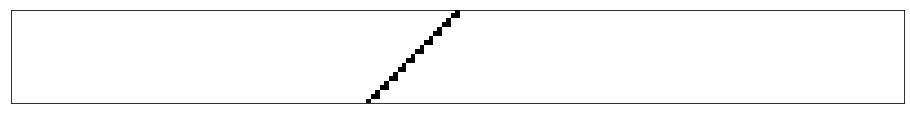

In [74]:
plot_evolution(evolve(Rule(6), s0_pert, 20))

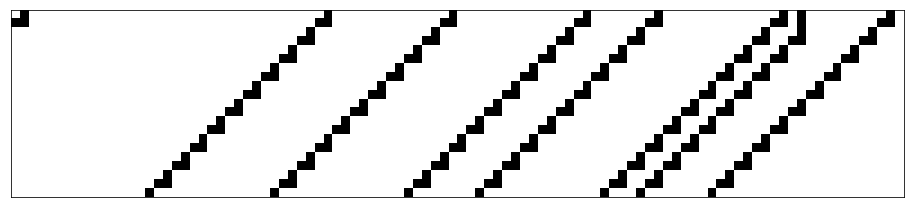

In [75]:
plot_evolution(evolve(Rule(6), s0_p1, 20))

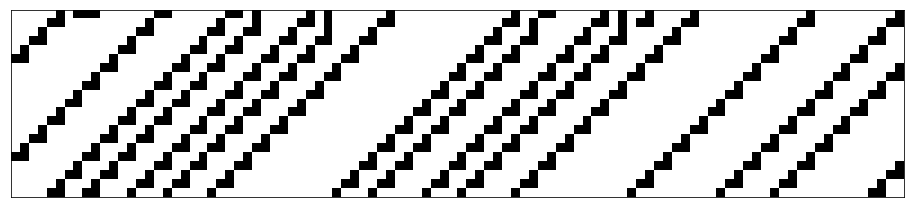

In [76]:
plot_evolution(evolve(Rule(6), s0_p3, 20))

In [77]:
plot_evolution(evolve(Rule(6), s0_p5, 20))

### Regra 7

A regra 7 liga uma célula desde que a célula da esquerda esteja desligada, a menos que a célula e sua vizinha da direita estejam ligadas simultaneamente.

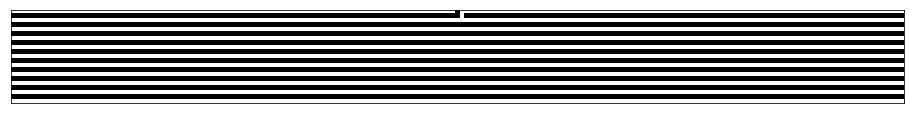

In [78]:
plot_evolution(evolve(Rule(7), s0_pert, 20))

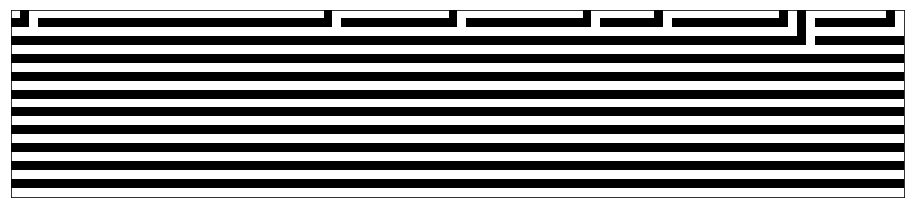

In [79]:
plot_evolution(evolve(Rule(7), s0_p1, 20))

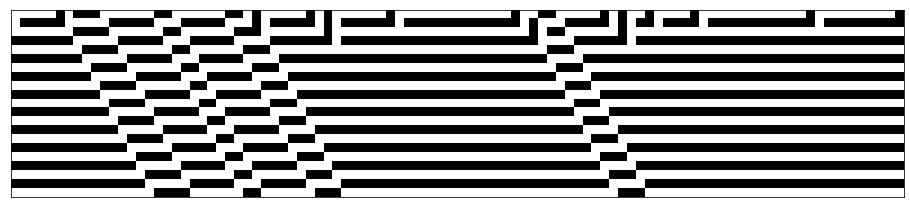

In [80]:
plot_evolution(evolve(Rule(7), s0_p3, 20))

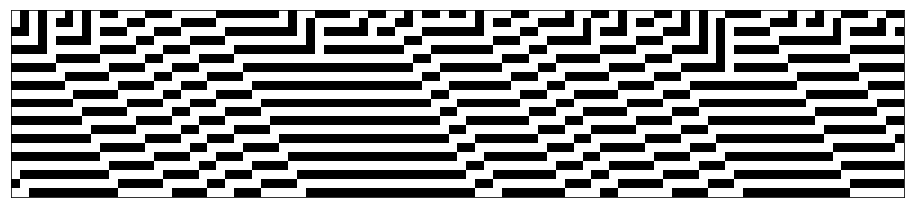

In [81]:
plot_evolution(evolve(Rule(7), s0_p5, 20))

## Comportamentos

A explicação do funcionamento de uma regra pode ser bastante complexa, então vamos parar de tentar fazer isso, e vamos apresentar alguns tipos de comportamentos distintos.

### Regras homogeinizantes

Algumas regras levam a que todas as células tenham constantemente o mesmo valor.

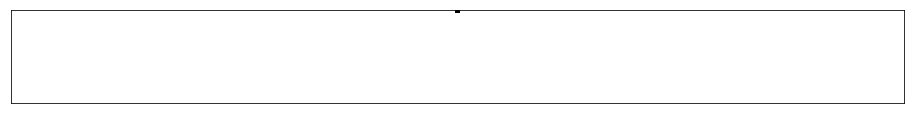

In [82]:
plot_evolution(evolve(Rule(8), s0_pert, 20))

In [83]:
plot_evolution(evolve(Rule(8), s0_p1, 20))

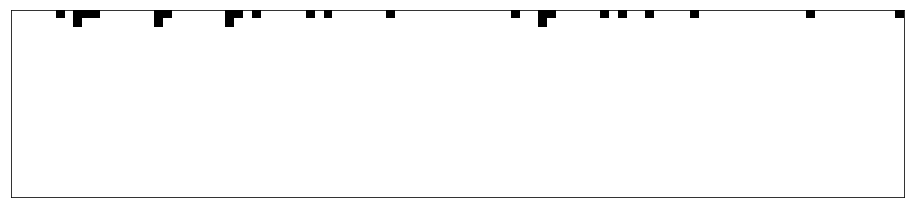

In [84]:
plot_evolution(evolve(Rule(8), s0_p3, 20))

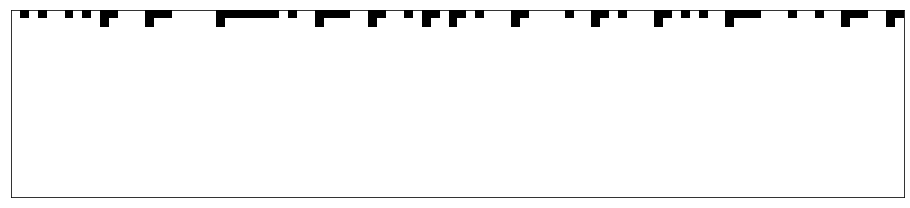

In [85]:
plot_evolution(evolve(Rule(8), s0_p5, 20))

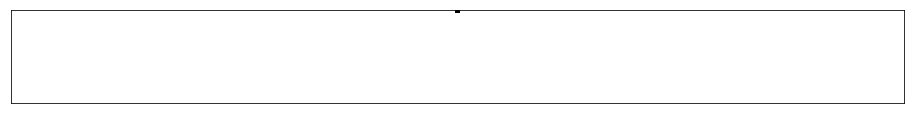

In [86]:
plot_evolution(evolve(Rule(96), s0_pert, 20))

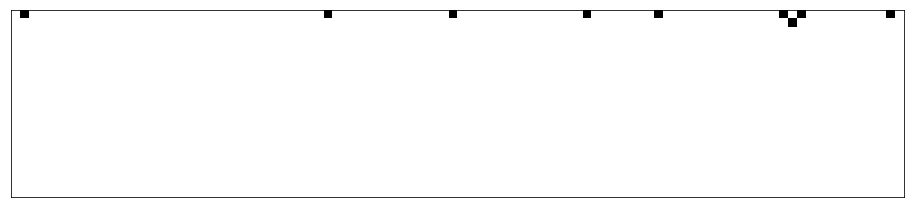

In [87]:
plot_evolution(evolve(Rule(96), s0_p1, 20))

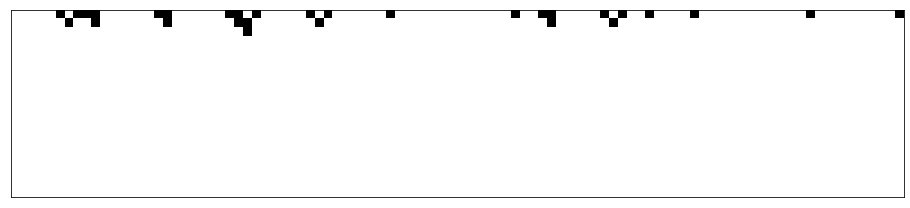

In [88]:
plot_evolution(evolve(Rule(96), s0_p3, 20))

In [89]:
plot_evolution(evolve(Rule(96), s0_p5, 20))

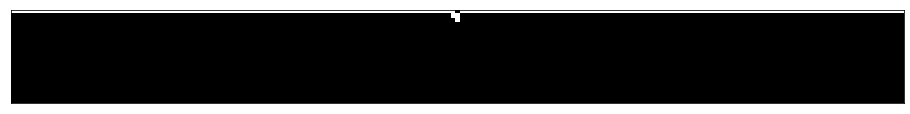

In [90]:
plot_evolution(evolve(Rule(249), s0_pert, 20))

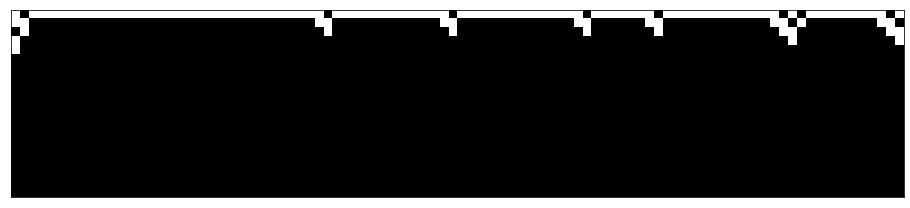

In [91]:
plot_evolution(evolve(Rule(249), s0_p1, 20))

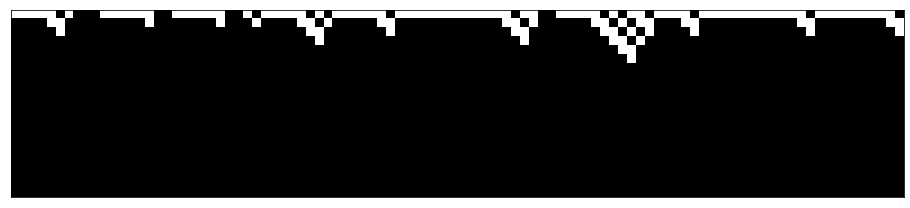

In [92]:
plot_evolution(evolve(Rule(249), s0_p3, 20))

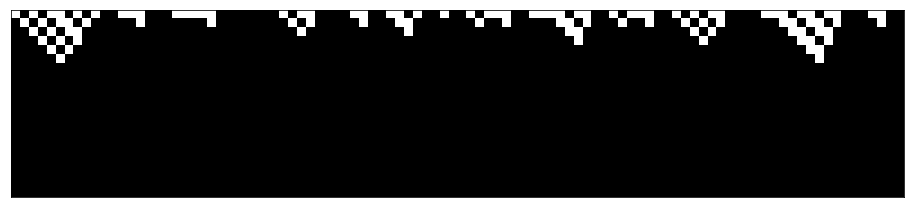

In [93]:
plot_evolution(evolve(Rule(249), s0_p5, 20))

### Regras oscilatórias

Algumas regras produzem oscilações (como já visto acima).

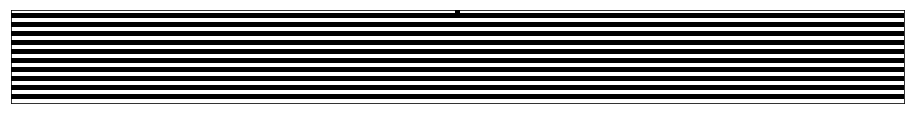

In [94]:
plot_evolution(evolve(Rule(31), s0_pert, 20))

In [95]:
plot_evolution(evolve(Rule(31), s0_p1, 20))

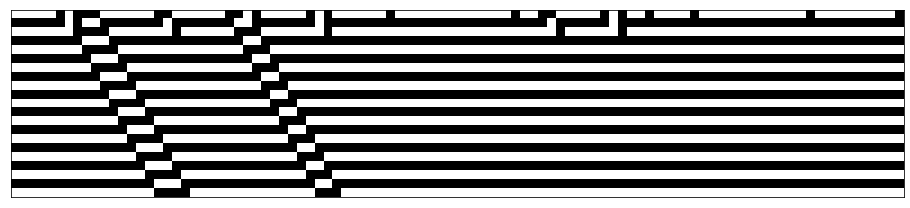

In [96]:
plot_evolution(evolve(Rule(31), s0_p3, 20))

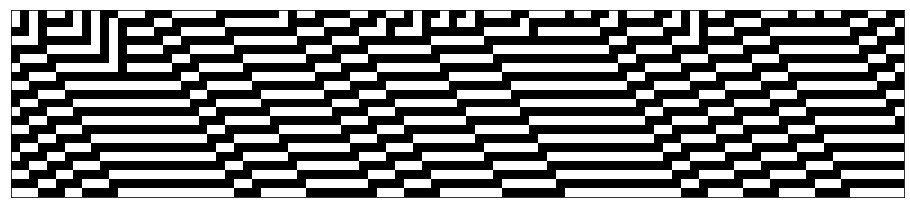

In [97]:
plot_evolution(evolve(Rule(31), s0_p5, 20))

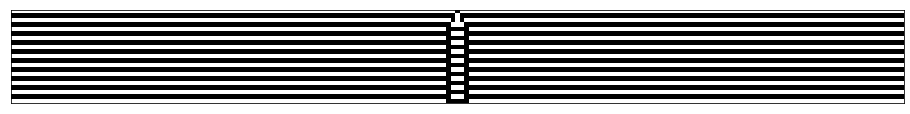

In [98]:
plot_evolution(evolve(Rule(91), s0_pert, 20))

In [99]:
plot_evolution(evolve(Rule(91), s0_p1, 20))

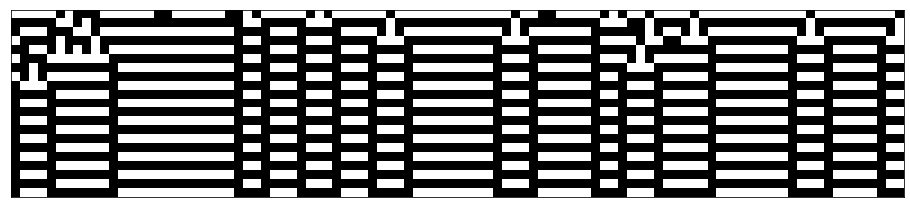

In [100]:
plot_evolution(evolve(Rule(91), s0_p3, 20))

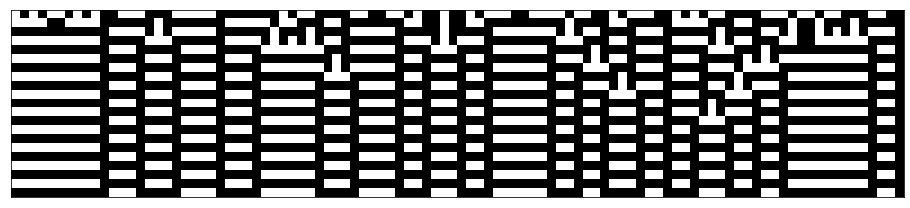

In [101]:
plot_evolution(evolve(Rule(91), s0_p5, 20))

Como vemos claramente neste último caso, o comportamento transiente até chegar na oscilação pode ser bastante interessante. Veja ainda as regras abaixo.

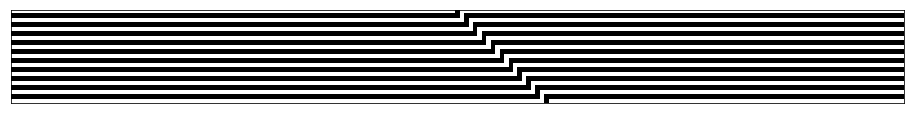

In [102]:
plot_evolution(evolve(Rule(15), s0_pert, 20))

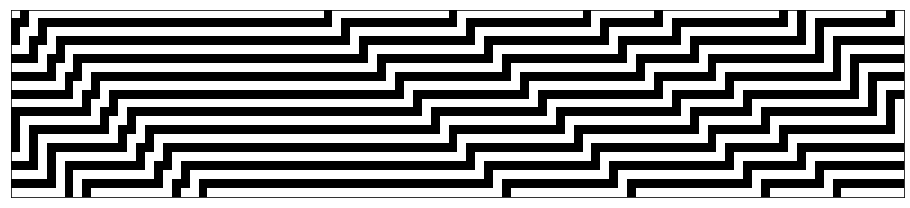

In [103]:
plot_evolution(evolve(Rule(15), s0_p1, 20))

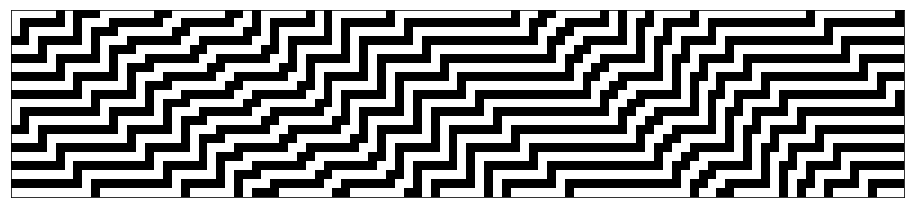

In [104]:
plot_evolution(evolve(Rule(15), s0_p3, 20))

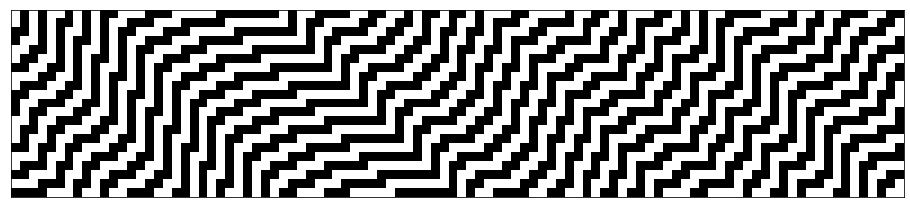

In [105]:
plot_evolution(evolve(Rule(15), s0_p5, 20))

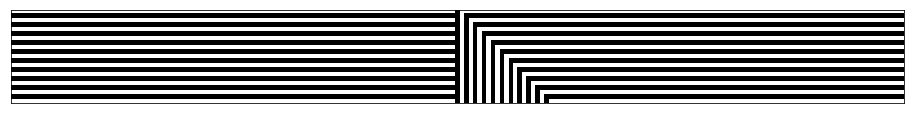

In [106]:
plot_evolution(evolve(Rule(79), s0_pert, 20))

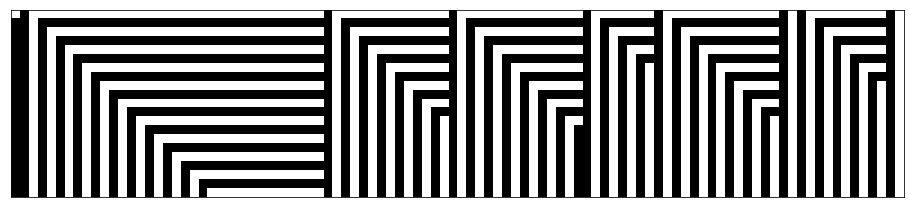

In [107]:
plot_evolution(evolve(Rule(79), s0_p1, 20))

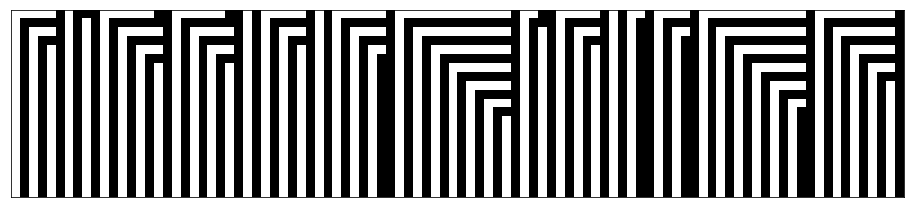

In [108]:
plot_evolution(evolve(Rule(79), s0_p3, 20))

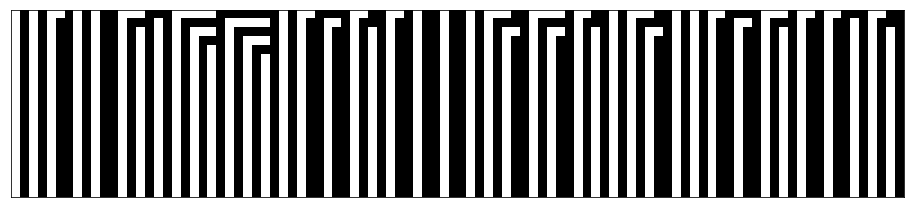

In [109]:
plot_evolution(evolve(Rule(79), s0_p5, 20))

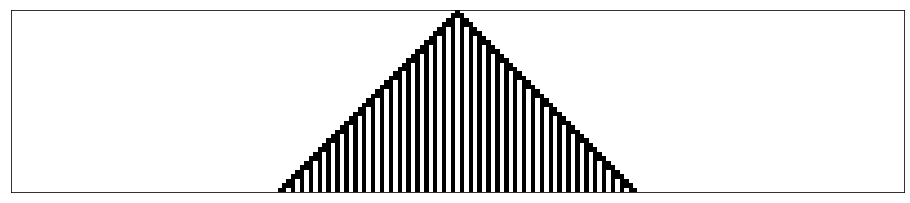

In [110]:
plot_evolution(evolve(Rule(94), s0_pert, 40))

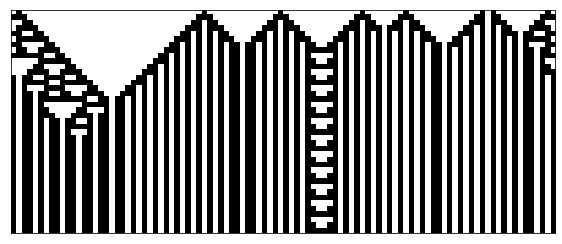

In [111]:
plot_evolution(evolve(Rule(94), s0_p1, 40))

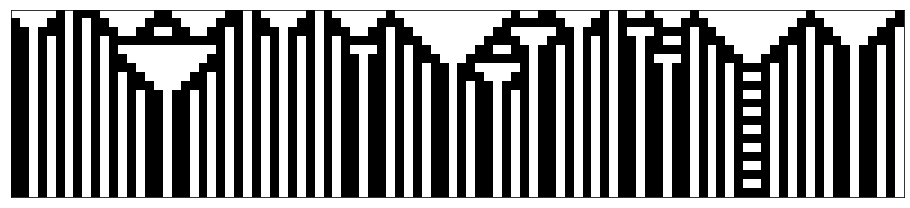

In [112]:
plot_evolution(evolve(Rule(94), s0_p3, 20))

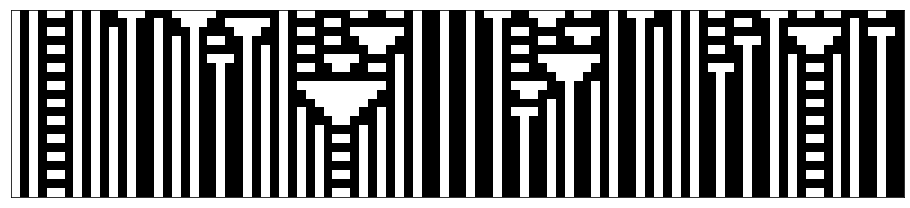

In [113]:
plot_evolution(evolve(Rule(94), s0_p5, 20))

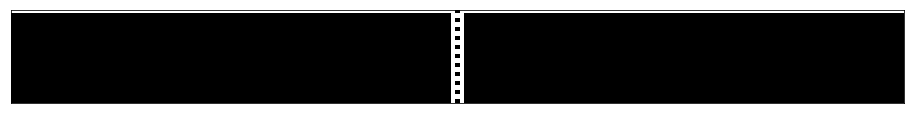

In [114]:
plot_evolution(evolve(Rule(201), s0_pert, 20))

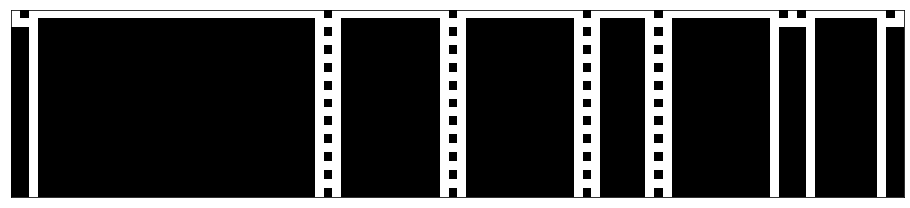

In [115]:
plot_evolution(evolve(Rule(201), s0_p1, 20))

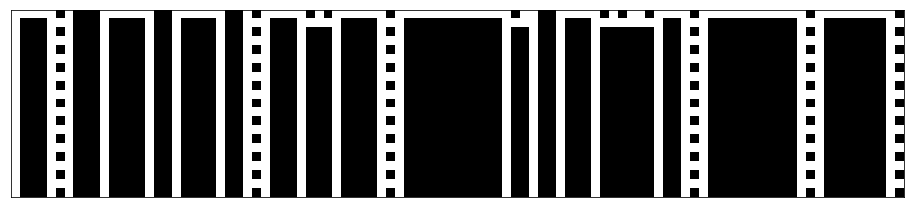

In [116]:
plot_evolution(evolve(Rule(201), s0_p3, 20))

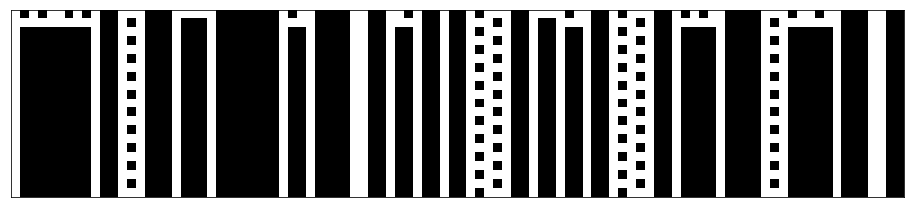

In [117]:
plot_evolution(evolve(Rule(201), s0_p5, 20))

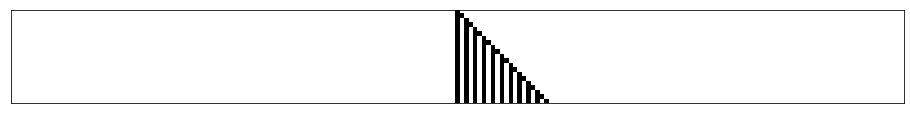

In [118]:
plot_evolution(evolve(Rule(156), s0_pert, 20))

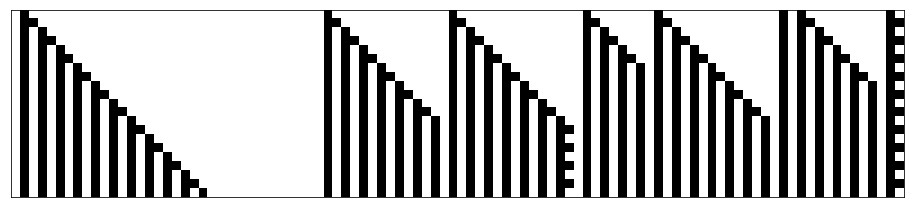

In [119]:
plot_evolution(evolve(Rule(156), s0_p1, 20))

In [120]:
plot_evolution(evolve(Rule(156), s0_p3, 20))

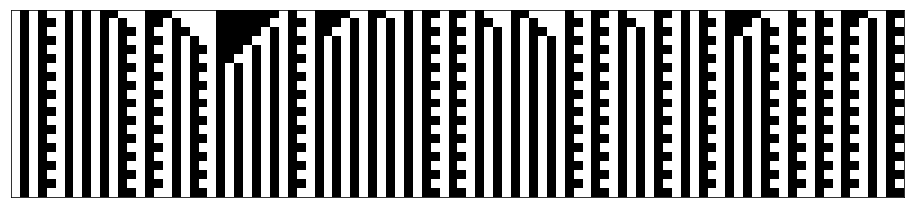

In [121]:
plot_evolution(evolve(Rule(156), s0_p5, 20))

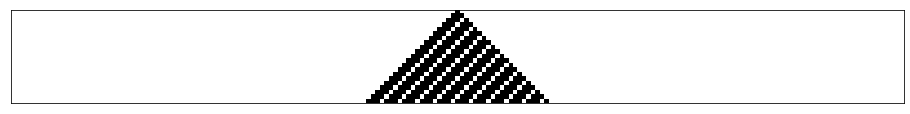

In [122]:
plot_evolution(evolve(Rule(190), s0_pert, 20))

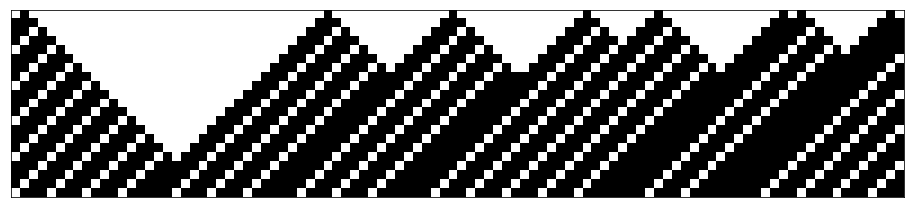

In [123]:
plot_evolution(evolve(Rule(190), s0_p1, 20))

In [124]:
plot_evolution(evolve(Rule(190), s0_p3, 20))

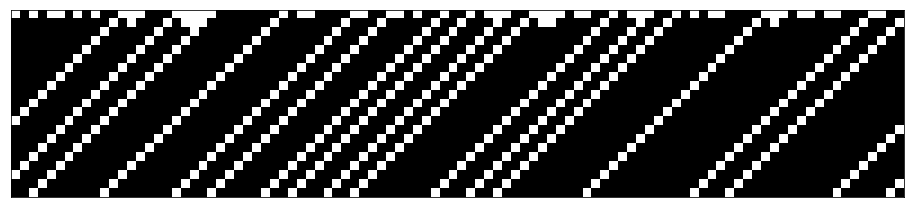

In [125]:
plot_evolution(evolve(Rule(190), s0_p5, 20))

### Regularidades elaboradas

Algumas regras geram comportamentos com regularidades elaboradas, de difícil descrição.

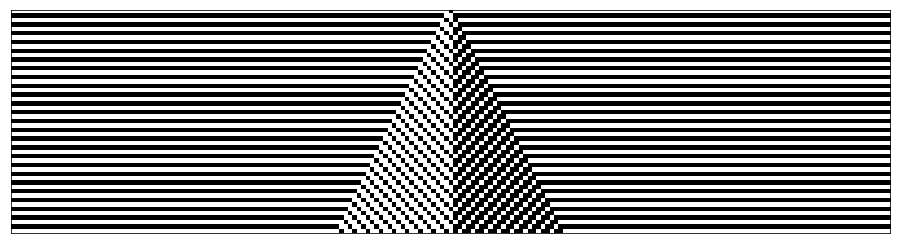

In [126]:
plot_evolution(evolve(Rule(57), s0_pert, 50))

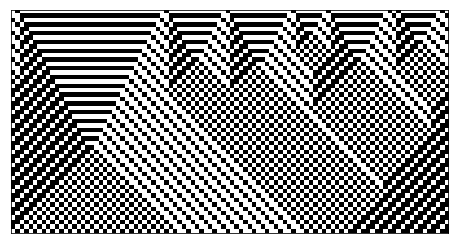

In [127]:
plot_evolution(evolve(Rule(57), s0_p1, 50))

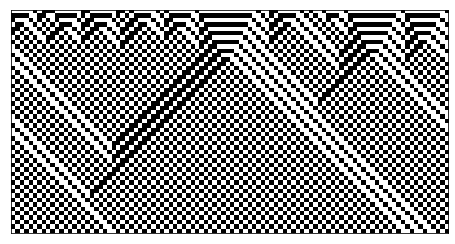

In [128]:
plot_evolution(evolve(Rule(57), s0_p3, 50))

In [129]:
plot_evolution(evolve(Rule(57), s0_p5, 50))

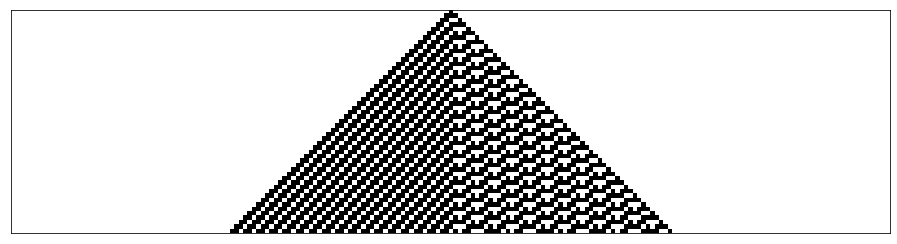

In [130]:
plot_evolution(evolve(Rule(62), s0_pert, 50))

In [131]:
plot_evolution(evolve(Rule(62), s0_p1, 50))

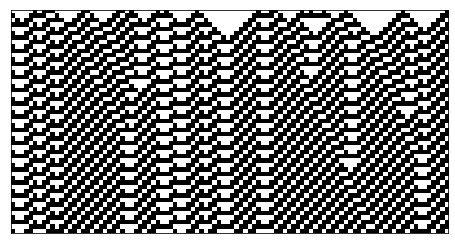

In [132]:
plot_evolution(evolve(Rule(62), s0_p3, 50))

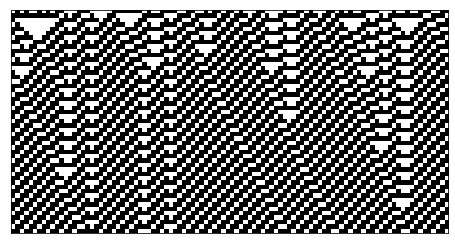

In [133]:
plot_evolution(evolve(Rule(62), s0_p5, 50))

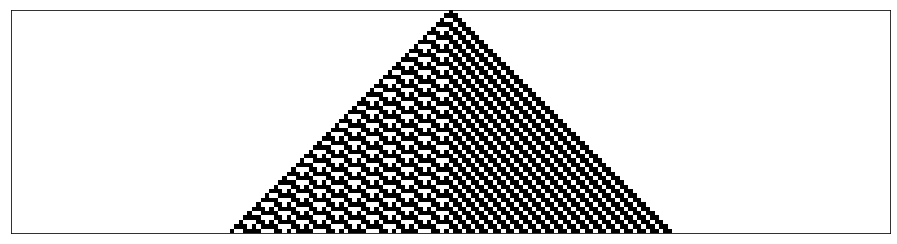

In [134]:
plot_evolution(evolve(Rule(118), s0_pert, 50))

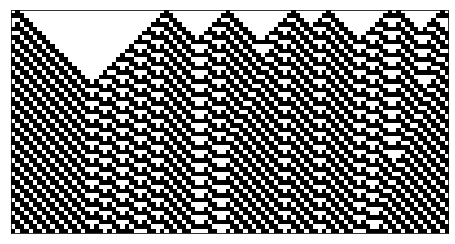

In [135]:
plot_evolution(evolve(Rule(118), s0_p1, 50))

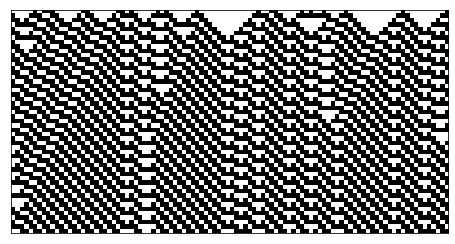

In [136]:
plot_evolution(evolve(Rule(118), s0_p3, 50))

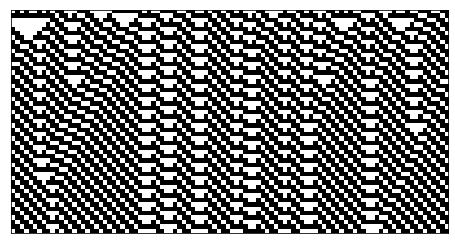

In [137]:
plot_evolution(evolve(Rule(118), s0_p5, 50))

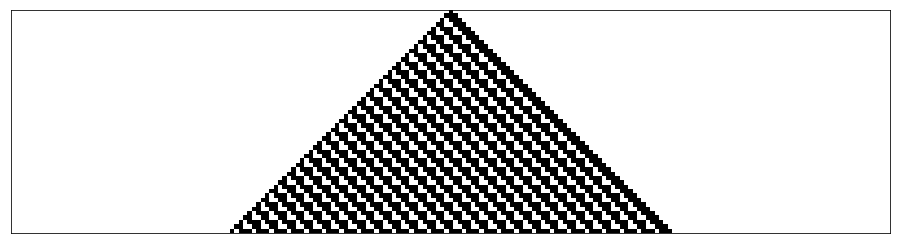

In [138]:
plot_evolution(evolve(Rule(214), s0_pert, 50))

In [139]:
plot_evolution(evolve(Rule(214), s0_p1, 50))

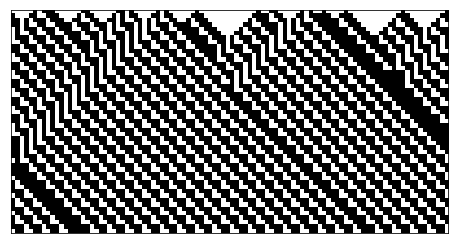

In [140]:
plot_evolution(evolve(Rule(214), s0_p3, 50))

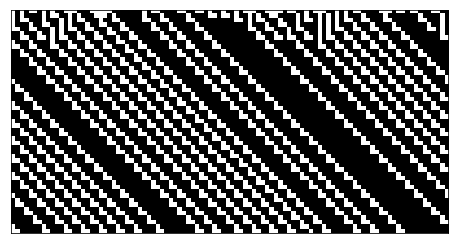

In [141]:
plot_evolution(evolve(Rule(214), s0_p5, 50))

### Comportamentos fractais

Algumas regras têm comportamento similar a fractais a perturbações.

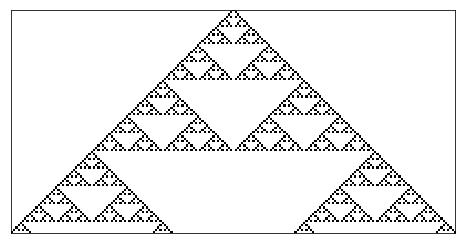

In [143]:
plot_evolution(evolve(Rule(18), s0_pert, 100))

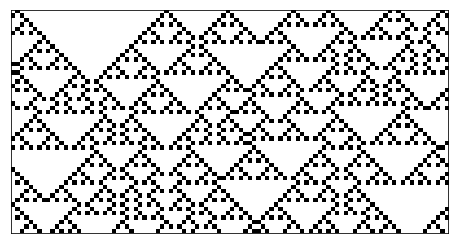

In [144]:
plot_evolution(evolve(Rule(18), s0_p1, 50))

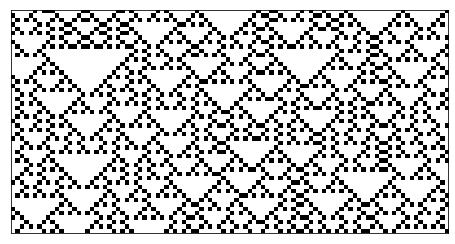

In [145]:
plot_evolution(evolve(Rule(18), s0_p3, 50))

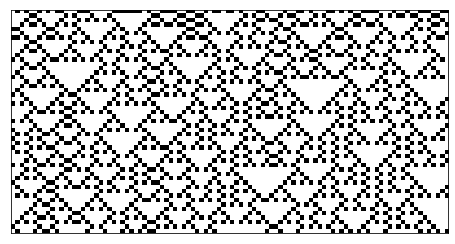

In [146]:
plot_evolution(evolve(Rule(18), s0_p5, 50))

Veja como o comportamento fractal a perturbação gera um comportamento extremamente complexo a condições com várias células inicialmente ligadas.

In [147]:
plot_evolution(evolve(Rule(90), s0_pert, 50))

In [148]:
plot_evolution(evolve(Rule(90), s0_p1, 50))

In [149]:
plot_evolution(evolve(Rule(90), s0_p3, 50))

In [150]:
plot_evolution(evolve(Rule(90), s0_p5, 50))

In [151]:
plot_evolution(evolve(Rule(60), s0_pert, 50))

In [152]:
plot_evolution(evolve(Rule(60), s0_p1, 50))

In [153]:
plot_evolution(evolve(Rule(60), s0_p3, 50))

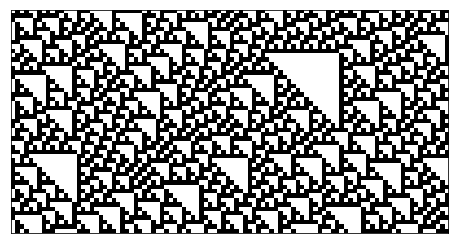

In [154]:
plot_evolution(evolve(Rule(60), s0_p5, 50))

Algumas regras, como a 218 abaixo, perdem o comportamento fractal dependendo da densidade.

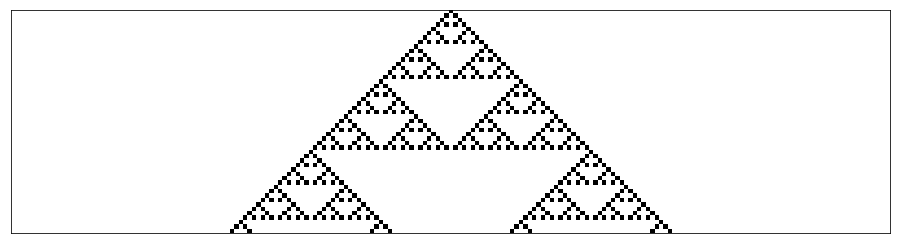

In [155]:
plot_evolution(evolve(Rule(218), s0_pert, 50))

In [156]:
plot_evolution(evolve(Rule(218), s0_p1, 50))

In [157]:
plot_evolution(evolve(Rule(218), s0_p3, 50))

In [158]:
plot_evolution(evolve(Rule(218), s0_p5, 50))